age — возраст
sex — пол (1 - мужчина, 0 - женщина)
cp — тип боли в груди (4 значения)
trestbps — артериальное давление в покое
chol — холестерин сыворотки в мг/дл
fbs — уровень сахара в крови натощак > 120 мг/дл
restecg — результаты электрокардиографии в покое (значения 0,1,2)
thalach — достигнута максимальная частота сердечных сокращений
exang — стенокардия, вызванная физической нагрузкой
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope — наклон пикового сегмента ST при нагрузке
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [1]:
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing

In [2]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

np.int64(79)

In [4]:
# функция определения среднего давления 
def trestbps_mean(row) :
    """_определитель среднего систолического давления_
    
    Args:
        age (_int_): возраст
        sex (_int_): пол
    Return:
        result (_int_): норма давления для данного возраста и пола
    """
    if row['sex'] == 1:
        if row['age'] <= 20:
            return 123
        elif 21 <= row['age'] <=30:
            return 126
        elif 31 <= row['age'] <=40:
            return 129
        elif 41 <= row['age'] <=50:
            return 135
        else:
            return 142
    else:
        if row['age']<= 20:
            return 116
        elif 21 <= row['age'] <= 30:
            return 120
        elif 31 <= row['age'] <=40:
            return 127
        elif 41 <= row['age'] <=50:
            return 137
        elif 51 <= row['age'] <= 60:
            return 144
        else:
            return 159

In [5]:
heart['trestbps_mean'] = heart[['sex', 'age']].apply(trestbps_mean, axis = 1)

In [6]:
heart['trestbps_mean'].iloc[300]

np.int64(142)

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [8]:
encoder = ce.OneHotEncoder(cols=['cp'], use_cat_names=True) # указываем столбец для кодирования
cp_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, cp_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean,cp_3.0,cp_2.0,cp_1.0,cp_0.0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135,1,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142,0,0,0,1


In [9]:
encoder = ce.OneHotEncoder(cols=['restecg'], use_cat_names=True) # указываем столбец для кодирования
restecg_bin = encoder.fit_transform(heart['restecg'])
heart = pd.concat([heart, restecg_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,old,trestbps_mean,cp_3.0,cp_2.0,cp_1.0,cp_0.0,restecg_0.0,restecg_1.0,restecg_2.0
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,142,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,129,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,137,0,0,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,142,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,144,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,144,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,135,1,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,1,142,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,142,0,0,0,1,0,1,0


In [10]:
encoder = ce.OneHotEncoder(cols=['slope'], use_cat_names=True) # указываем столбец для кодирования
slope_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, slope_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_3.0,cp_2.0,cp_1.0,cp_0.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_0.0,slope_2.0,slope_1.0
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,1,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,1,0,1,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,...,1,0,0,0,0,1,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,1,0,1,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,1,0,1,0,0,0,1


In [11]:
encoder = ce.OneHotEncoder(cols=['ca'], use_cat_names=True) # указываем столбец для кодирования
ca_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, ca_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_1.0,restecg_2.0,slope_0.0,slope_2.0,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,1,0,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,1,0,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,0,0,0,1,1,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,0,0,0,1,1,0,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,0,0,1,0,1,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,0,1,0,0,1,0,0


In [12]:
encoder = ce.OneHotEncoder(cols=['thal'], use_cat_names=True) # указываем столбец для кодирования
thal_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, thal_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [13]:
col = ['cp', 'restecg', 'slope', 'ca', 'thal']
heart = heart.drop(columns=col, axis=1)

In [14]:
heart.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
col_names = list(heart.columns)
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)
df_r.describe()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [16]:
round(df_r['chol'].std(), 6)

np.float64(0.816232)

In [17]:
import plotly.graph_objects as go
import numpy as np

<Axes: >

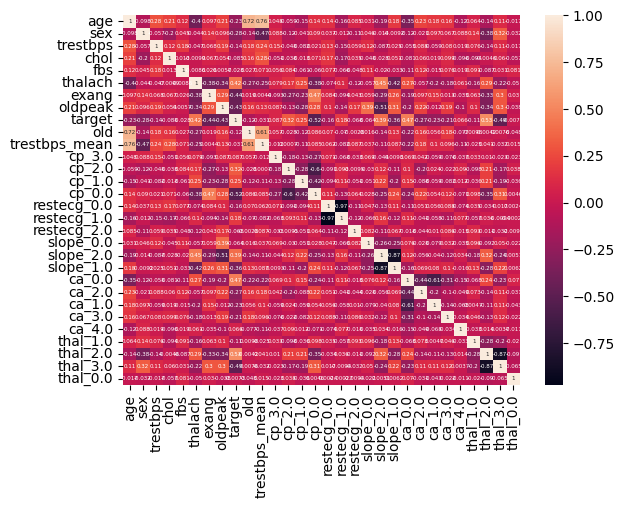

In [18]:
sns.heatmap(df_r.corr(), annot=True, annot_kws={'size': 4}, 
            xticklabels=df_r.columns, yticklabels=df_r.columns)